Hunter Bennett | Glass Lab | Kupffer Strains Project | 05 Feb 2021  

In [13]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Set working directory

In [15]:
dataDirectory = '/gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/AMLN_30week/'
workingDirectory = '/home/h1bennet/strains/results/01_Strains_AMLN_ATAC/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Quality control

In [16]:
qc = ngs_qc(dataDirectory, 'atac')

/gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/AMLN_30week//
./AMLN_30week_qc/


<Figure size 432x288 with 0 Axes>

In [17]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,unmappedReads,uniquelyMappedFraction,mappedFraction
00_NCoRWT_Kupffer_ATAC_AMLNDiet_20week_LN203D_JSS_TDT_180425,8237700.0,56.0,0.004158,1.376,-1.0,19361182.0,13365320.0,5454120.0,541742.0,0.690315,0.972019
00_NCoRWT_Kupffer_ATAC_AMLNDiet_21week_LN170C_JSS_TDT_160919,6253498.0,58.0,0.003473,1.514,-1.0,20727593.0,12236737.0,4621242.0,3869614.0,0.590360,0.813311
00_NCoRWT_Kupffer_ATAC_AMLNDiet_30week_LN136C_JSS_TDT_160919,9064736.0,59.0,0.004248,1.277,-1.0,20234157.0,13531151.0,4727738.0,1975268.0,0.668728,0.902380
00_NCoRWT_Kupffer_ATAC_AMLNDiet_30week_LN141A_JSS_TDT_160921,7779856.0,58.0,0.003661,1.283,-1.0,22718210.0,13730589.0,4646877.0,4340744.0,0.604387,0.808931
01_balbc_Kupffer_ATAC_AMLNDiet_30week_Balb3C_JSS_TDT_160926,6057305.0,57.0,0.003482,1.565,-1.0,18190097.0,10509313.0,4289298.0,3391486.0,0.577749,0.813553
01_balbc_Kupffer_ATAC_AMLNDiet_30week_Balb3D_JSS_TDT_160928,9527141.0,56.0,0.006185,1.768,-1.0,31141068.0,19077862.0,6833961.0,5229245.0,0.612627,0.832079
02_aj_Kupffer_ATAC_AMLNDiet_30week_AJ3A_JSS_TDT_160926,12016776.0,56.0,0.005644,1.279,-1.0,26107220.0,16762661.0,5535162.0,3809397.0,0.642070,0.854086
02_aj_Kupffer_ATAC_AMLNDiet_30week_AJ3B_JSS_TDT_160926,11315706.0,56.0,0.005187,1.248,-1.0,25726029.0,16002703.0,5275659.0,4447667.0,0.622043,0.827114


### Plot tag count distribution

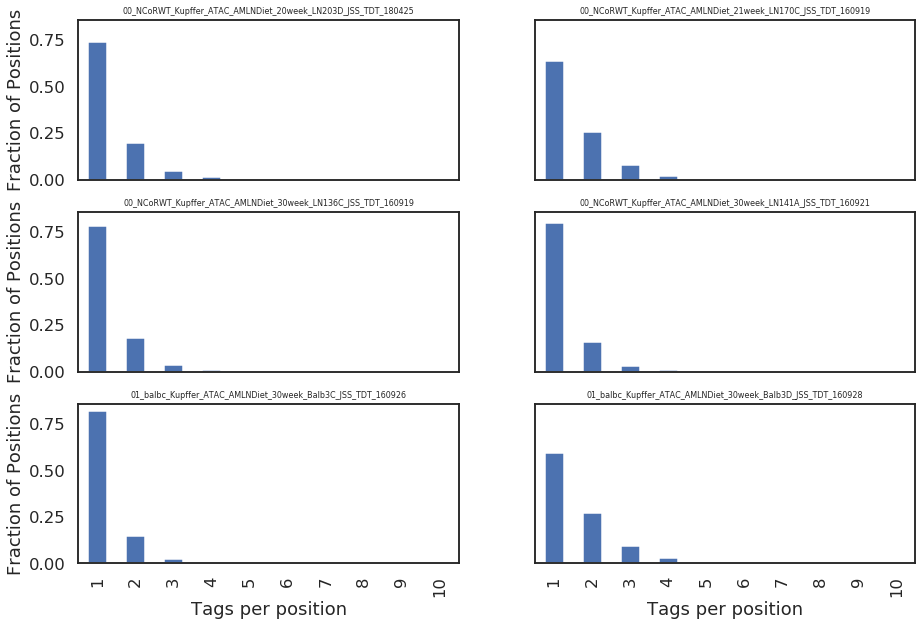

In [5]:
tds = glob.glob(dataDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(3,2, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

### make browser hub (run on command line for now)

|Colors:|      |
|------|------|
|AJ:| 228,26,28|  
|Balb:| 55,126,184| 
|C57:| 77,175,74|



In [6]:
makeMultiWigHub.pl hrb_strains_atac_amln_30weeks mm10 -force -color \
77,175,74 77,175,74 \
55,126,184 55,126,184 \
228,26,28 228,26,28 \
-d /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/AMLN_30week/*

SyntaxError: invalid syntax (<ipython-input-6-45e2a747b012>, line 1)

# Call Peaks

In [7]:
%%bash
# delete the existing script file
rm ./peakCalling_homer.sh
# create a script file
touch ./peakCalling_homer.sh

# if directories don't exist, create them
if [ ! -d ./atac_peak_files/ ]; then mkdir ./atac_peak_files; fi

rm: cannot remove ‘./peakCalling_homer.sh’: No such file or directory


In [8]:
with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in os.listdir(dataDirectory):
        find_peaks_idr = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-L', '0', '-C', '0', '-fdr', '0.9', '-style',
                          'factor', '-size', '200', '>',
                          workingDirectory + '/atac_peak_files/' + tagdir + '_peaks.tsv',
                          '&', '\n']
        find_peaks = ['findPeaks', dataDirectory + '/' + tagdir,
                      '-style', 'factor', '-size', '200', '>',
                      workingDirectory + '/atac_peak_files/' + tagdir + '_default_peaks.tsv',
                      '&', '\n']
        # write commands to file
        f.write(' '.join(find_peaks_idr))
        f.write(' '.join(find_peaks))
f.close()

### compile peak stats for QC

In [9]:
peak_stats={}

for td in os.listdir('./atac_peak_files/'):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open('./atac_peak_files/'+td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [10]:
df.sort_index(inplace=True)

### Save to file

In [11]:
df.loc[df.index.str.contains('default'), :].to_csv('./default_peak_table.txt', sep='\t')
df.loc[~df.index.str.contains('default'), :].to_csv('./idr_peak_table.txt', sep='\t')